In [23]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# import mido
import string
import numpy as np
# from utilis import get_pianoroll_data
import pickle
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# import mido
import string
import numpy as np
# from utilis import get_pianoroll_data
import pickle
from sklearn import preprocessing
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from torch.utils.data import TensorDataset


In [1]:
!python ../Data_Preprocessing/Emotion_MIDI2.py ../Toy_Dataset/adl-piano-midi/ ./Processed_Data/

^C
All content numbers is 18
Total number of muisc 182
Total number of muisc 434
Total number of muisc 691
Total number of muisc 942
Total number of muisc 1248
Total number of muisc 1568
Total number of muisc 1885
Total number of muisc 2180
Total number of muisc 2417



100%|██████████| 18/18 [00:00<00:00, 58.34it/s] 

0it [00:00, ?it/s]
3it [00:00, 10.43it/s]
6it [00:00, 16.84it/s]
11it [00:00, 24.84it/s]
15it [00:00, 28.82it/s]
22it [00:00, 31.46it/s]
56it [00:00, 93.99it/s]
66it [00:01, 60.94it/s]
74it [00:01, 52.76it/s]
81it [00:01, 40.83it/s]
86it [00:02, 37.24it/s]
91it [00:02, 37.37it/s]
105it [00:02, 54.26it/s]
118it [00:02, 69.16it/s]
143it [00:02, 107.74it/s]
157it [00:02, 97.57it/s] 
169it [00:02, 87.04it/s]
180it [00:03, 76.59it/s]
189it [00:03, 57.25it/s]
197it [00:03, 47.33it/s]
211it [00:03, 60.57it/s]
221it [00:03, 52.89it/s]
228it [00:04, 51.92it/s]
235it [00:04, 53.71it/s]
243it [00:04, 55.18it/s]
255it [00:04, 68.49it/s]
263it [00:04, 40.42it/s]
269it [00:05, 43.48it/s]
275it [00:05, 42.35it/s]
281it [00:05, 44.18it/s]
287it [00:05, 26.34it/s]
292it [00:06, 22.38it/s]
296it [00:06, 23.33it/s]
301it [00:06, 26.06it/s]
305it [00:06, 21.77it/s]
308it [00:07, 14.70it/s]
311it [00:07, 13.09it/s]
313it [00:07, 12.04it/s]
320it [00:07, 18

In [3]:
!python ../Data_Preprocessing/Emotion_Label.py ./Processed_Data/ ./Processed_Data/


  0%|          | 0/18 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (1195 > 512). Running this sequence through the model will result in indexing errors

100%|██████████| 18/18 [00:13<00:00,  1.34it/s]
Traceback (most recent call last):
  File "C:\Milestone 2\Milestone 2\696-Milestone\Data_Preprocessing\Emotion_Label.py", line 101, in <module>
    file = open(output_dir + '/lakh_emotion'+str(n)+'.bin','wb')
NameError: name 'output_dir' is not defined


In [5]:
# Open_file
file=open("Processed_Data/lakh_emotion.bin","rb")
music_data = pickle.load(file) #保存list到文件
file.close()

In [6]:
# Show the Flan-T5 Generated Labels
np.unique([x[1] for x in music_data])

array(['anger', 'awe', 'boo', 'cool', 'ecstatic', 'emotional',
       'enlightened', 'esattino', 'fearful', 'fearless', 'grit', 'happy',
       'hopeful', 'joy', 'love', 'negative', 'peace', 'positive', 'sad',
       'sadness',
       "tytythegantheganyoubirdslet's body, everybody jailhousespiderphyedorphone, little in 'bone. the inoisthemionlelet's body, everybody",
       'woo'], dtype='<U131')

In [10]:
music_data[0][0].shape

(512, 128)

In [7]:
(np.array([x[0].shape[0] for x in music_data])>612).sum()

0

In [13]:
# Replace repetive labels
from tqdm import tqdm
X = []
y = []
chosen_label = ['sadness', 'happy', 'love', 'joy', 'negative', 'positive', 'anger',
       'awe', 'emotional', 'hopeful', 'angry', 'excited', 'fear', 'hurt',
       'fearful']
# for i in tqdm(range(1,10)):
file=open("Processed_Data/lakh_emotion.bin","rb")
music_data = pickle.load(file) #保存list到文件
file.close()
for m in music_data:
    if m[1] in chosen_label:
        X.append(m[0])
        if m[1] == 'anger':
            m[1] = 'angry'
        if m[1] == 'fearful':
            m[1] = 'fear'
        if m[1] == 'joy':
            m[1] = 'happy'
        y.append(m[1])
X = np.array(X)

In [15]:
# Unique Labels
np.unique(y)

num_labels = len(np.unique(y))

In [16]:
# Transform labels into one-hot variable
from sklearn import preprocessing
import torch

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

label_dict = {}
for cl in le.classes_:
    label_dict.update({cl:le.transform([cl])[0]})

In [17]:
# Define CNN
class CNNModel(nn.Module):
    def __init__(self, hiddenSize, outChannels, dropoutRate, activate):
        super().__init__()
        self.outChannels = outChannels
        self.activate = nn.Sigmoid() if activate == "Sigmoid" else nn.ReLU()
        self.conv1 = nn.Conv2d(1, 24, (10,1))
        self.pool = nn.MaxPool2d((2, 1))
        self.conv2 = nn.Conv2d(24, 48, (10,1))
        self.conv3 = nn.Conv2d(48, 96, (10,1))
        self.conv4 = nn.Conv2d(96, 192, (10,1))
        self.conv5 = nn.Conv2d(192, 384, (5,2))
        self.conv6 = nn.Conv2d(384, 192, (5,2))
        self.dense1 = nn.Linear(48384, hiddenSize)
        self.dropout = nn.Dropout(dropoutRate)
        self.dense2 = nn.Linear(hiddenSize, num_labels)

    def forward(self, x):
        x = self.pool(self.activate(self.conv1(x)))
        x = self.pool(self.activate(self.conv2(x)))
        # print(x.shape)
        x = self.dropout(self.pool(self.activate(self.conv3(x))))
        x = self.pool(self.activate(self.conv4(x)))
        x = self.pool(self.activate(self.conv5(x)))
        x = self.pool(self.activate(self.conv6(x)))
        # print(x.shape)
        x = x.view(-1, 48384)
        x = self.dropout(self.activate(self.dense1(x)))
        return self.dense2(x)

# Number of neurons in the first fully-connected layer
hiddenSize = 4096
# Number of feature filters in second convolutional layer
numFilters = 25
# Dropout rate
dropoutRate = 0.2
# Activation function
activation = "ReLU"
# Learning rate
learningRate = 0.005
# Momentum for SGD optimizer
momentum = 0.9
# Number of training epochs
numEpochs = 20

In [20]:
# Helper function - Train and validation
from tqdm import tqdm
def train_epoch(cnn,device,dataloader,loss_fn,optimizer):
    cnn.train()
    cnnRunningLoss = 0
    total = 0
    R2 = 0
    cnnCorrect=0
    total1=0
    for i, (inputs, labels) in enumerate(dataloader, 0):
        optimizer.zero_grad()
        inputs = inputs.to('cuda').reshape(-1,1,512,128)
        
        labels = labels.to('cuda')
        # Forward propagation
        cnnOutputs = cnn(inputs)
        # print(cnnOutputs.shape)
        l2_lambda = 0.001
        l2_reg = torch.tensor(0.).to('cuda')
        for param in cnn.parameters():
            l2_reg += torch.norm(param)
        # Backpropagation
        cnnLoss = criterion(cnnOutputs, labels)+l2_reg*l2_lambda
        cnnLoss.backward()
        # Gradient update
        optimizer.step()
        total += 1
        total1+=labels.size(0)
        cnnRunningLoss += cnnLoss.item()
        _, cnnPredicted = torch.max(cnnOutputs.data, 1)
        cnnCorrect += (cnnPredicted == labels).sum().item()
    return cnnRunningLoss/total, cnnCorrect/total1

def valid_epoch(cnn,device,dataloader,loss_fn):
    cnn.eval()
    totalLoss = 0
    total = 0
    total1 = 0
    R2 = 0
    cnnLoss = 0
    cnnCorrect=0
    for inputs, labels in dataloader:
        inputs = inputs.to('cuda').reshape(-1,1,512,128)
        labels = labels.to('cuda')
        cnnOutputs = cnn(inputs)
        cnnLoss = loss_fn(cnnOutputs, labels)
        _, cnnPredicted = torch.max(cnnOutputs.data, 1)
        total += labels.size(0)
        total1 +=1
        totalLoss += cnnLoss.item()
        cnnCorrect += (cnnPredicted == labels).sum().item()
    accuracy = cnnCorrect / total * 100
    cnn.train()
    return totalLoss/total1, accuracy

In [38]:
# Training
import sklearn
from sklearn.model_selection import StratifiedKFold
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Split to aviod data leakage

X_train_v = torch.as_tensor(X_train_v, dtype=torch.float) # an alternative to torch.from_numpy
y_train_v = torch.as_tensor(y_train_v, dtype=torch.float)
X_test = torch.as_tensor(X_test, dtype=torch.float)
y_test = torch.as_tensor(y_test, dtype=torch.float)
splits=StratifiedKFold(n_splits=5,shuffle=True,random_state=99)
train_dataset = TensorDataset(X_train_v, y_train_v)
test_dataset = TensorDataset(X_test, y_test)
batch_size=128
models = []
history = {'fold':[], 'train_loss': [], 'test_loss': [],'train_acc':[],'test_acc':[]}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for fold, (train_idx,val_idx) in enumerate(splits.split(X_train_v,y_train_v)):
    print('Fold {}'.format(fold + 1))
    t = pd.DataFrame(y_train_v[train_idx], columns = ['class']).reset_index()
    idx = []
    # Resampling to form a balanced dataset
    y_train = []
    for i in range(0,num_labels):
      idx += list(t[t['class']==i].sample(100,replace=True)['index'])
      y_train += [i]*100
    X_train = X_train_v[train_idx][idx]

    t = pd.DataFrame(y_train_v[val_idx], columns = ['class']).reset_index()
    idx = []
    y_val = []
    for i in range(0,num_labels):
      # print(i)
      if i in t['class'].values:
          idx += list(t[t['class']==i].sample(20,replace=True)['index'])
          y_val += [i]*20
    X_val =  X_train_v[val_idx][idx]

    X_train = torch.as_tensor(X_train, dtype=torch.float) # an alternative to torch.from_numpy
    y_train = torch.as_tensor(y_train, dtype=torch.float).type(torch.LongTensor)
    X_val = torch.as_tensor(X_val, dtype=torch.float)
    y_val = torch.as_tensor(y_val, dtype=torch.float).type(torch.LongTensor)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_val, y_val)

    from torch.utils.data import Dataset, DataLoader
    train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)
    
    model = CNNModel(hiddenSize, numFilters, dropoutRate, activation).to('cuda')
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(list(model.parameters()), lr=learningRate, momentum=momentum)
    # optimizer = torch.optim.Adam(list(model.parameters()), lr=learningRate)
    best_test = -np.inf
    best_model = None
    #Train the model
    for epoch in range(numEpochs):
        train_loss, train_R2=train_epoch(model,device,train_dataloader,criterion,optimizer)
        test_loss, test_R2=valid_epoch(model,device,test_dataloader,criterion)
        history['fold'].append(fold)
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['train_acc'].append(train_R2)
        history['test_acc'].append(test_R2)   
        if test_R2>best_test:
            test_test = test_R2
            best_model = model
        print('Train Loss: {}, Train_acc: {}, Test Loss: {}, Test acc: {}'.format(train_loss, train_R2, test_loss, test_R2))
    models.append([best_model])

D:\programing\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fold 1
Train Loss: 2.112361580133438, Train_acc: 0.329, Test Loss: 1.8845508098602295, Test acc: 53.75
Train Loss: 1.2638694792985916, Train_acc: 0.712, Test Loss: 1.425838828086853, Test acc: 73.125
Train Loss: 0.9805141389369965, Train_acc: 0.786, Test Loss: 0.8909777998924255, Test acc: 78.75


KeyboardInterrupt: 

In [40]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [34]:
# Calculate the average accuracy of the 5-fold best models
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
t = pd.DataFrame(y_test, columns = ['class']).reset_index()
idx = []
y_test = []
for i in range(0,num_labels):
    if i in t['class'].values:
        idx += list(t[t['class']==i].sample(10,replace=True)['index'])
        y_test += [i]*10
X_test =  X_test[idx]
X_test = torch.as_tensor(X_test, dtype=torch.float)
y_test = torch.as_tensor(y_test, dtype=torch.float).type(torch.LongTensor)
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)
acc=[]
for best_model in models:
    acc.append(valid_epoch(best_model[0],device,test_dataloader,criterion)[1])

In [35]:
np.mean(acc)

30.0

In [85]:
# Calculate the accuray with majority votes
outputs = []    
for model in models:
  model[0].eval()
  model_output = []
  label_= []
  model[0].to('cpu')
  for inputs, labels in test_dataloader:
      inputs = inputs.to('cpu').reshape(-1,1,512,128)
      labels = labels.to('cpu')
      cnnOutputs = model[0](inputs)
      model_output.append(cnnOutputs)
      label_.append(labels)
  outputs.append(torch.vstack(model_output))

In [87]:
cnnresult = torch.vstack(outputs).reshape(-1,shape[0],shape[1]).mean(axis=0)
labels = np.hstack(label_)
_, cnnPredicted = torch.max(cnnresult.data, 1)
cnnCorrect = (cnnPredicted.detach().numpy() == labels).sum().item()
cnnCorrect/len(labels)*100

40.0

<Axes: >

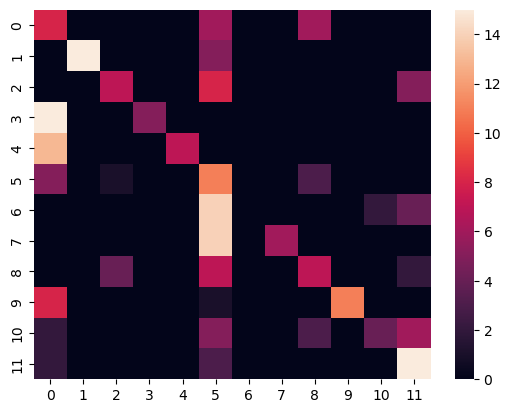

In [89]:
# Draw the confusion matrix
from sklearn.metrics import confusion_matrix
confu_m = confusion_matrix(labels, cnnPredicted)
import seaborn as sns
sns.heatmap(confu_m,square=False)

In [90]:
# Extract the labels
label_dict = {}
for cl in le.classes_:
    label_dict.update({cl:le.transform([cl])[0]})
label_dict

{'angry': 0,
 'awe': 1,
 'emotional': 2,
 'excited': 3,
 'fear': 4,
 'happy': 5,
 'hopeful': 6,
 'hurt': 7,
 'love': 8,
 'negative': 9,
 'positive': 10,
 'sadness': 11}

In [97]:
# Calculate the evaluation scores
from sklearn.metrics import precision_recall_fscore_support
scores = pd.DataFrame(precision_recall_fscore_support(cnnPredicted, labels, labels = list(range(12))),index=['precision','recall','f1','support'], columns = list(label_dict)[:12])
scores

/mnt/storage/CIIP_group/Postdoc/Aiqi_Sun/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,angry,awe,emotional,excited,fear,happy,hopeful,hurt,love,negative,positive,sadness
precision,0.400000,0.750000,0.350000,0.25,0.350000,0.550000,0.0,0.300000,0.350000,0.550000,0.200000,0.750000
recall,0.150943,1.000000,0.583333,1.00,1.000000,0.148649,0.0,1.000000,0.368421,1.000000,0.666667,0.468750
f1,0.219178,0.857143,0.437500,0.40,0.518519,0.234043,0.0,0.461538,0.358974,0.709677,0.307692,0.576923
support,53.000000,15.000000,12.000000,5.00,7.000000,74.000000,0.0,6.000000,19.000000,11.000000,6.000000,32.000000


In [ ]:
import pickle
file = open('midi_test_data','rb')
music_data = pickle.load(file)
file.close()

In [121]:
# Try the classification on some pure or Chinese music
X_test_1 = []
name = []
for m in music_data:
    if m[0].shape[0]>=612:
        X_test_1.append(m[0][100:612,:])
        name.append(m[1])
X_test_1 = np.array(X_test_1)
y_test_1 = models[0][0](torch.as_tensor(X_test_1.reshape(-1,1,512,128), dtype=torch.float))
label = torch.argsort(-y_test_1).to('cpu').numpy()
for i in range(len(label)):
    print(name[i],le.classes_[label[i][0]], le.classes_[label[i][1]], le.classes_[label[i][2]])

Across_The_Stars(StarWar_II_Love_Theme) happy negative sadness
PAL1_theme-仙剑1 happy love sadness
上海滩 happy sadness negative
月光奏鸣曲 happy love negative
枉凝眉 happy positive love
水调歌头·明月几时有 sadness love hurt
沧海一声笑 love angry sadness
笑傲江湖 sadness happy negative
铁血丹心 happy negative sadness
难念的经-天龙八部 sadness happy love
青花瓷 happy negative love
